In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Monty Hall's Problem 
## Python Monte Carlo Simulation

**Monty Hall problem** is a statistical problem inspired by a popular TV show and named after its host. You can find more information about the problem [here](https://en.wikipedia.org/wiki/Monty_Hall_problem).

This notebook presents a Monte Carlo simulation of Monty Hall problem.

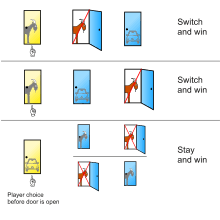

In [2]:
# Define parameters
n_trials = 100000

In [3]:
rwrd   = []
change = []


for i in range(n_trials):    
    all_doors      = [1, 2, 3]                      # All doors
    reward         = np.random.choice(all_doors)    # Define where the reward is
    primary_choice = np.random.choice(all_doors)    # Define your primary choice
        
    # Monty opens the door
    monty_opens = all_doors.copy()
    monty_opens.remove(reward)
    
    if primary_choice != reward:
        monty_opens.remove(primary_choice)
    
    monty_opens = np.random.choice(monty_opens)
     
    # You make your choice (stay / change) 
    to_choose = all_doors.copy()
    to_choose.remove(monty_opens)
        
    secondary_choice = np.random.choice(to_choose)
    
    # Let's record choices
    if secondary_choice == primary_choice:
        change.append(0)
    else: 
        change.append(1)
            
    if secondary_choice == reward:
        rwrd.append(1)
    else: 
        rwrd.append(0)

In [4]:
# Create a dataframe with results
data = pd.DataFrame({'change': change,
                     'rwrd': rwrd})

In [5]:
# Get statistics
values = data.groupby('change').mean().values

[]

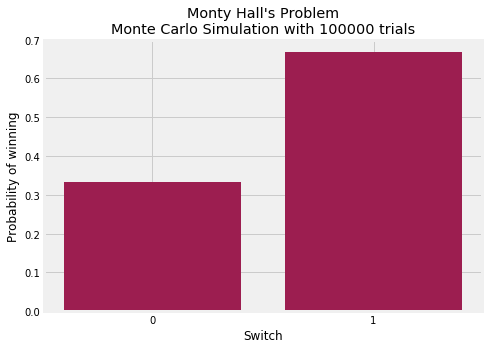

In [6]:
# Plot the results
plt.figure(figsize = (7, 5))

plt.bar(x = [0, 1], 
        height = values.squeeze(),
        color = '#9c1e50')
plt.title(f"Monty Hall's Problem\nMonte Carlo Simulation with {n_trials} trials")
plt.xticks([0, 1])
plt.xlabel("Switch")
plt.ylabel("Probability of winning")
plt.plot()

As we can see, switching is much more profitable in the long run than sticking to your first choice.